<a href="https://colab.research.google.com/github/vsalahi/PGP-DSBA-UTA/blob/SL_Regression/SLF_Project_LearnerNotebook_FullCode_VahidSalahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 20)

## Data Overview

In [ ]:
# loading the dataset
data = pd.read_csv("used_device_data.csv")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

# looking at 10 random rows, random_state is set to ensure we get the same results every time
data.sample(n=10, random_state=1)

There are 3454 rows and 15 columns.


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


* There are some rows with __Others__ listed as their `os` value
* Is seems `main_cameraa_mp` is the only attribute with some missing values, but all the columns need to be checked
* `screen_size` needs to be checked for number of unique values to see if it needs to be treated as categorical or numerical attribute
* Simillarly, `int_memory` and `ram` are descrete numbers and could be as categorical data type

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [ ]:
# checking for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate values in the data.

In [ ]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* In addition to the `main_camera_mp`, there are more columns with missing values
* `normalized_used_price` is the dependent variable with *float* data type.

In [ ]:
# checking for missing values in the data.
df.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* The majority of missing values are in `main_camera_mp` column and few in other attributes

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().sort_values(ascending=False).index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis

Target variable: **`normalized_used_price`**

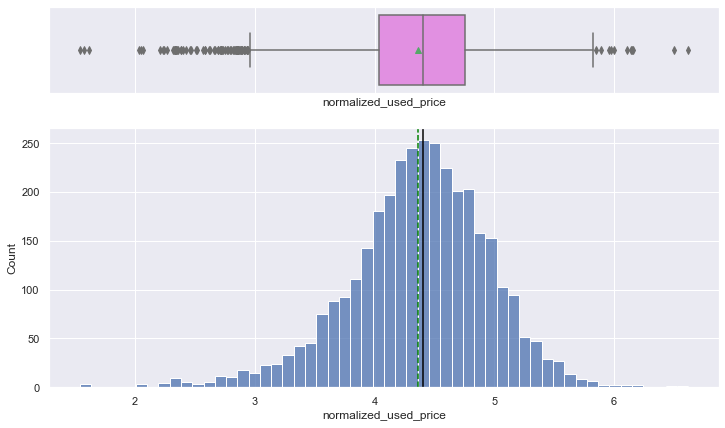

In [ ]:
histogram_boxplot(df, "normalized_used_price")

Target variable seems to follow a normal distribution well.

Below is EDA for independent variables

**`normalized_new_price`**

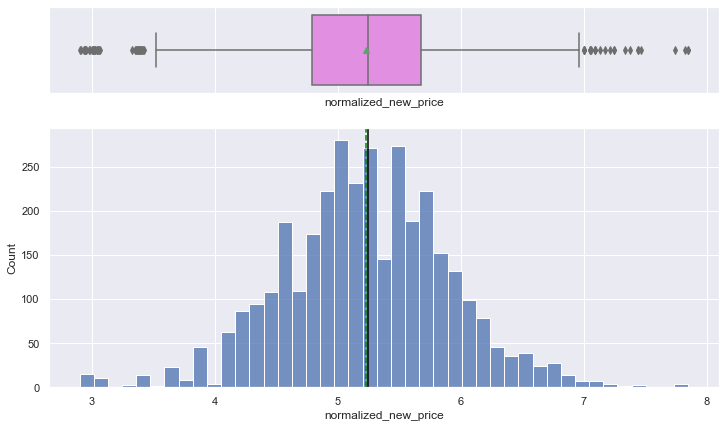

In [ ]:
histogram_boxplot(df, 'normalized_new_price')

**`screen_size`**

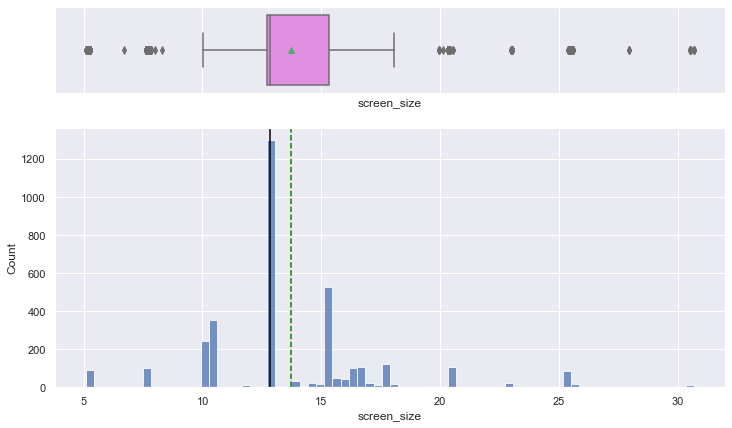

In [ ]:
histogram_boxplot(df, 'screen_size')

`screen_size` does not seems to have continous values but since the number of unique values are too many, we can keep it as numeric variable. We also could categorized the screen size into handfull of groups and treat it as categorical variable.

**`main_camera_mp`**

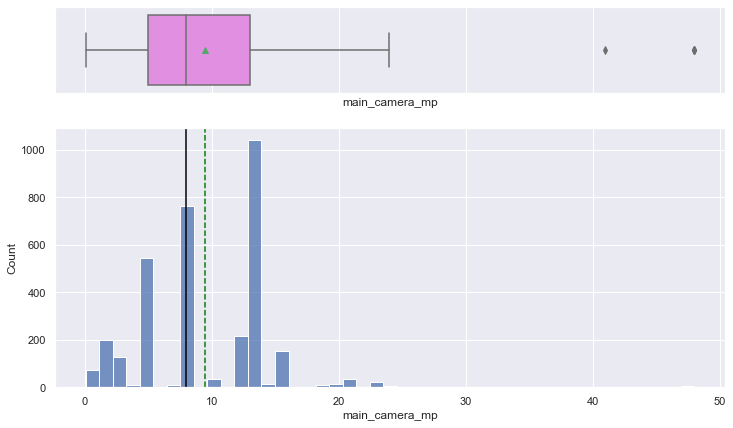

In [ ]:
histogram_boxplot(df, 'main_camera_mp')

There seems to be some outlier for some devices with very high main camera resolution.

**`selfie_camera_mp`**

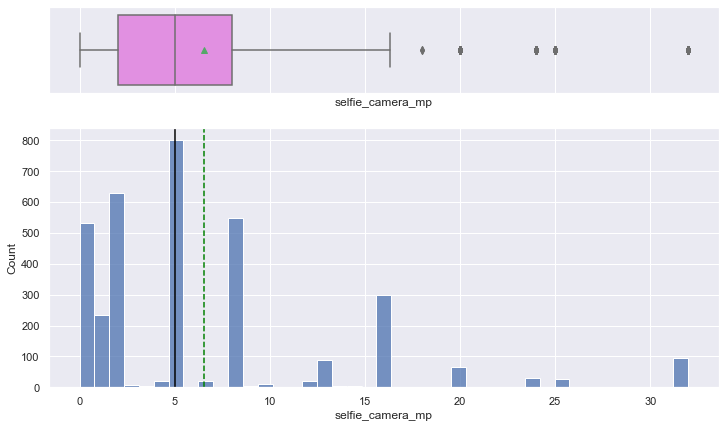

In [ ]:
histogram_boxplot(df, 'selfie_camera_mp')

**`int_memory`**

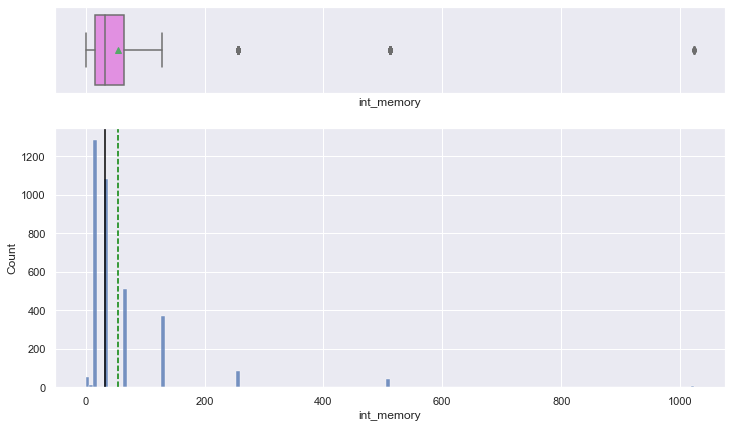

In [ ]:
histogram_boxplot(df, 'int_memory')

It appears to be some outlier for devices with larger memory

**`ram`**

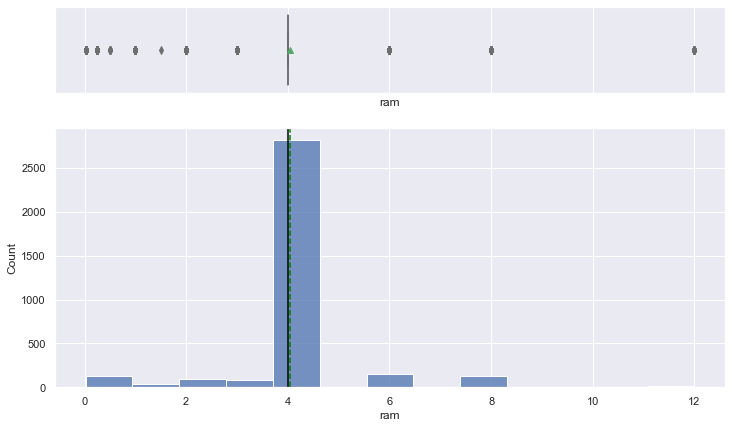

In [ ]:
histogram_boxplot(df, 'ram') 

Memory is descrete value and does not need to be treated for outlier. If we remove the outliers, it will most likely become a constant value.

**`weight`**

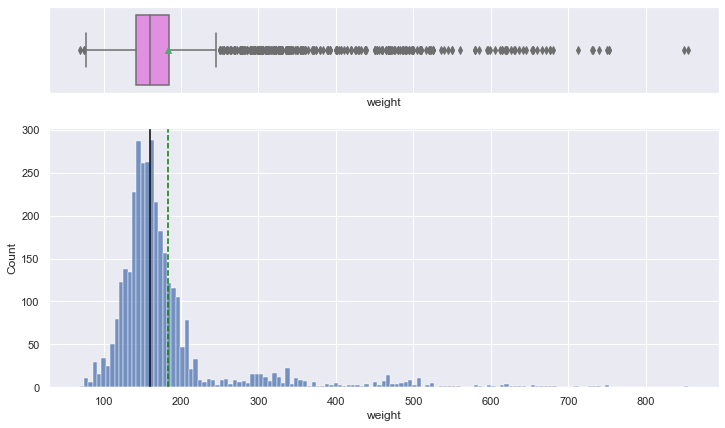

In [ ]:
histogram_boxplot(df, 'weight')

The distribution looks heavily right-skewed. Log transformation might help reducing the skewness and get the distribution closer to normal

In [ ]:
# log transformation
df["weight_log"] = np.log(df["weight"])

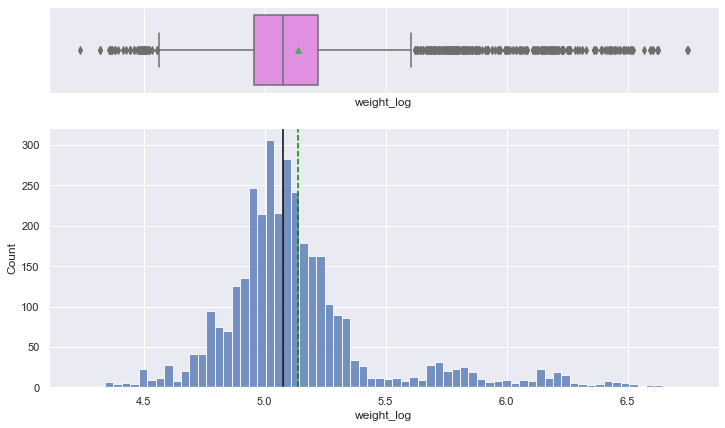

In [ ]:
histogram_boxplot(df, 'weight_log')

**`battery`**

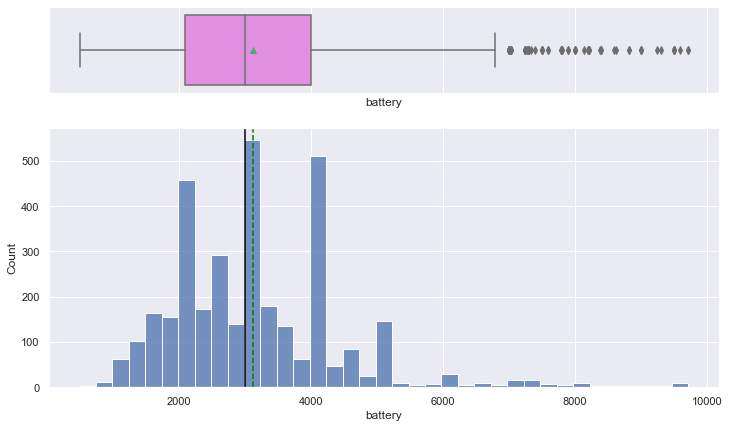

In [ ]:
histogram_boxplot(df, 'battery')

**`days_used`**

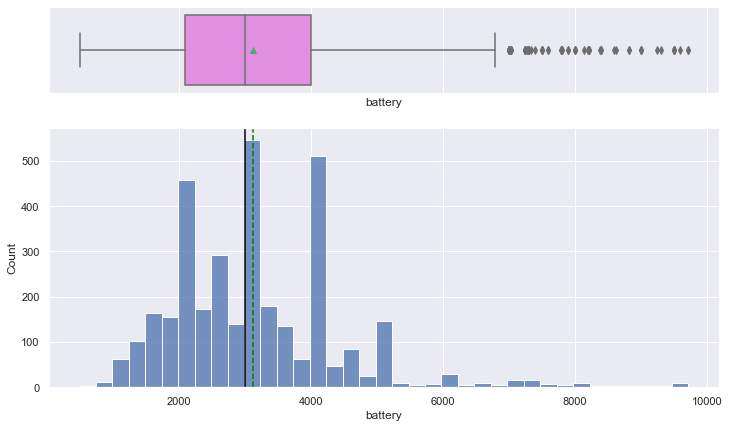

In [ ]:
histogram_boxplot(df, 'battery')

**`brand_name`**

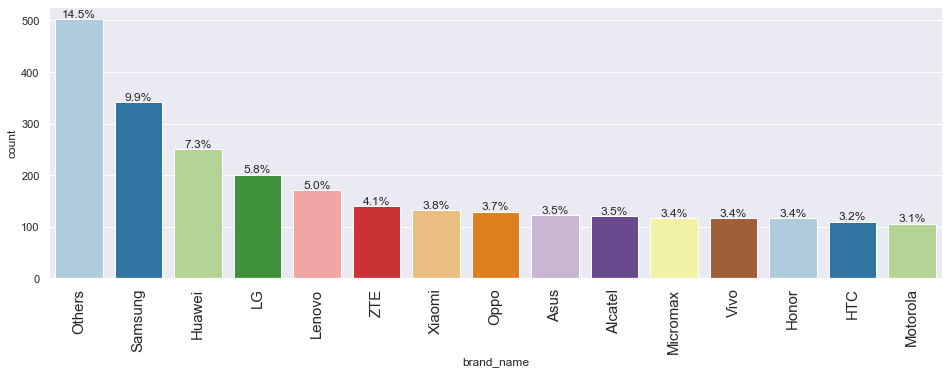

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=15)

**`os`**

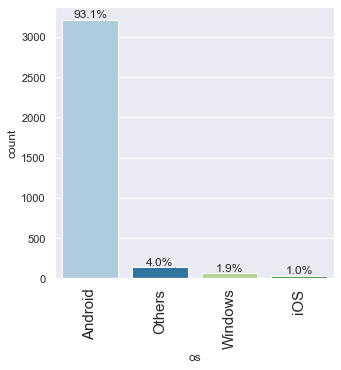

In [ ]:
labeled_barplot(df, 'os',perc=True)

**`4g`**

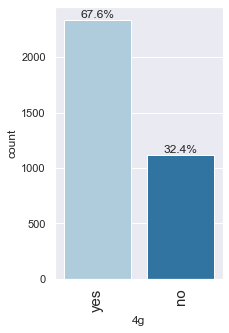

In [ ]:
labeled_barplot(df, '4g', perc=True)

**`5g`**

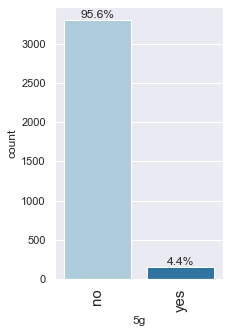

In [ ]:
labeled_barplot(df, '5g', perc=True)

**`release_year`**

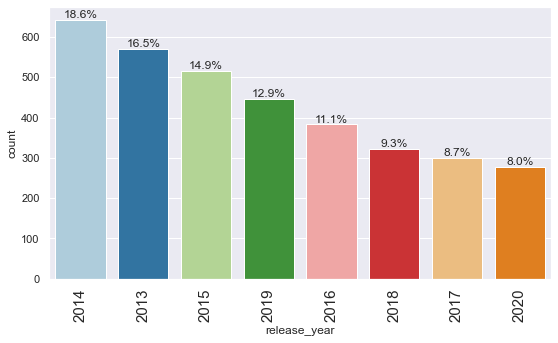

In [ ]:
labeled_barplot(df, 'release_year', perc=True)

## Bivariate Analysis

#### 1. What does the distribution of normalized used device prices look like?

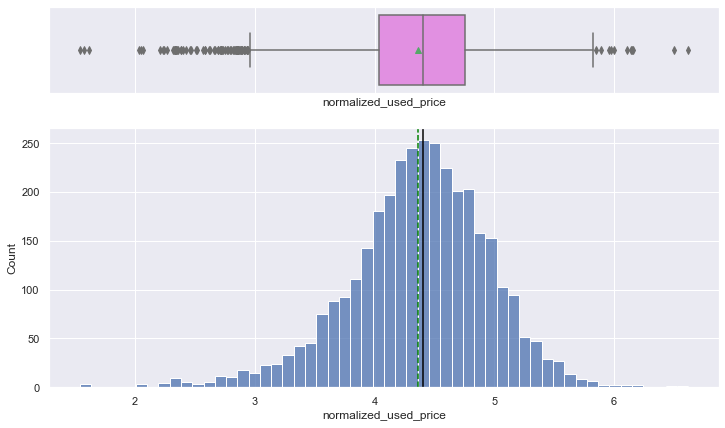

In [ ]:
histogram_boxplot(df, "normalized_used_price")

#### 2. What percentage of the used device market is dominated by Android devices?

3214 out of 3454 of the devices (93.05%) are Android; see below:


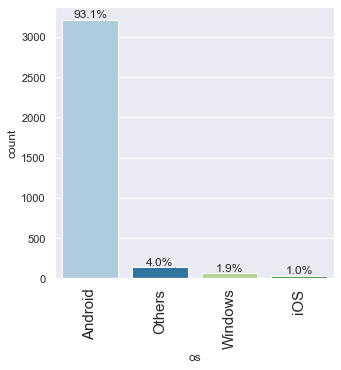

In [ ]:
an = df[df['os'] == "Android"].shape[0]
print(f'{an} out of {df.shape[0]} of the devices ({np.round(100 * an/df.shape[0], 2)}%) are Android; see below:')
labeled_barplot(df,'os', perc=True)

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

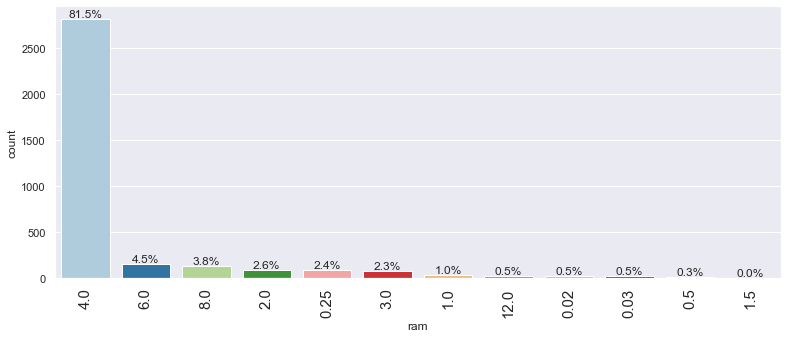

In [ ]:
labeled_barplot(df, "ram", perc=True)

* 81.5% of the devices have a ram of 4 GB
* Below shows the variability of `ram` based on each `os`:

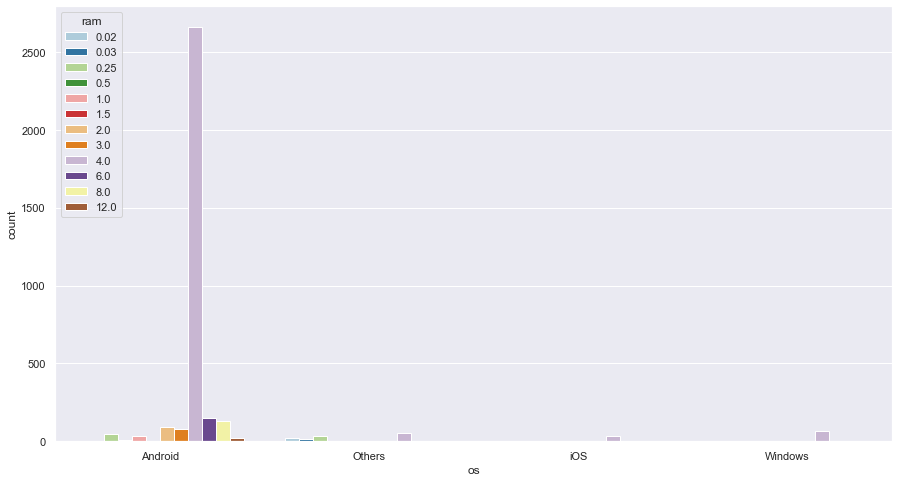

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'os', hue = 'ram', palette="Paired",);

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

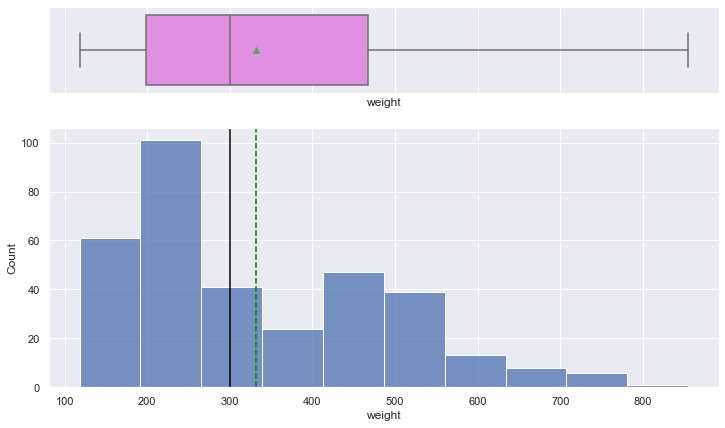

In [ ]:
histogram_boxplot(df[df['battery'] > 4500], "weight")

* The weight histogram of devices with larger bateries shows some right-skewness 

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

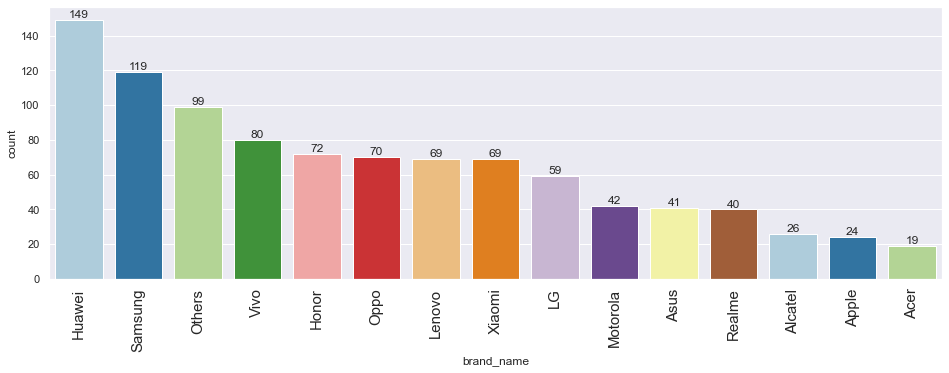

In [ ]:
screen_larger_6 = df[df['screen_size'] > 6 * 2.54]
labeled_barplot(screen_larger_6, 'brand_name', n=15)

* Huawei has the maximum number of devices with screen larger than 6 inches

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

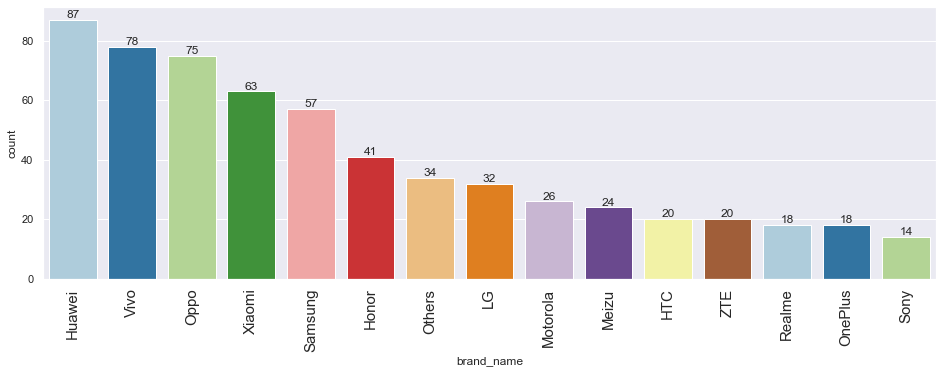

In [ ]:
selfie_camera_greater_8 = df[df['selfie_camera_mp'] > 8]
labeled_barplot(selfie_camera_greater_8,'brand_name', n=15)

* Huawei has the maximum number of devices with selfie camera greater than 8MP

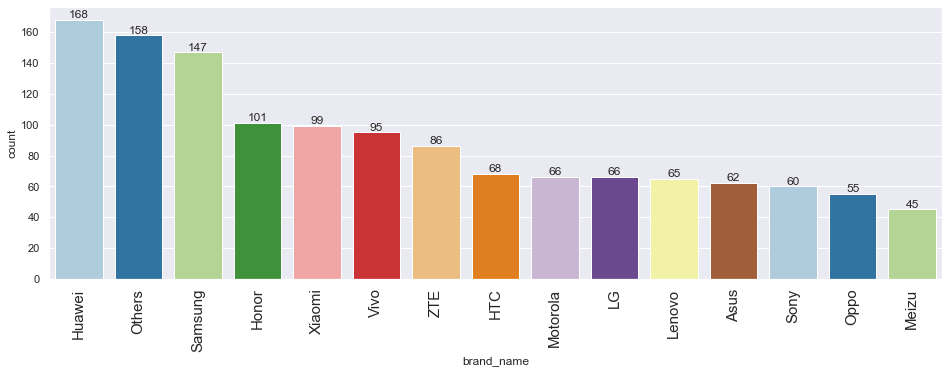

In [ ]:
main_camera_greater_8 = df[df['main_camera_mp'] > 8]
labeled_barplot(main_camera_greater_8,'brand_name', n=15)

* Huawei also has the maximum number of devices with main camera greater than 8MP

#### 7. Which attributes are highly correlated with the normalized price of a used device?

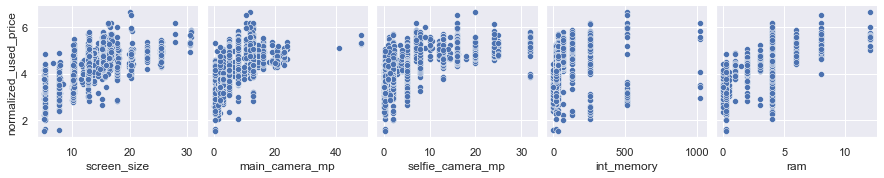

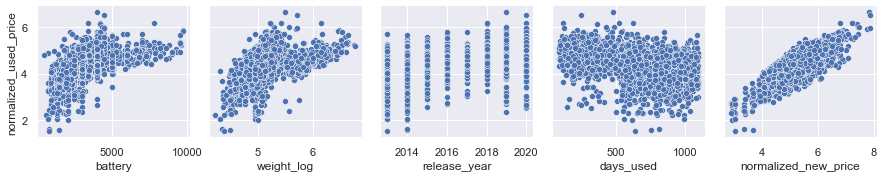

In [ ]:
# pairplot to graphically see the correlation between the `normalized_used_price` and other factors
sns.pairplot(data=df, y_vars = 'normalized_used_price', x_vars=['screen_size','main_camera_mp','selfie_camera_mp',
                                                                'int_memory','ram']);
sns.pairplot(data=df, y_vars = 'normalized_used_price', x_vars=['battery','weight_log','release_year', 'days_used',
                                                                'normalized_new_price']);

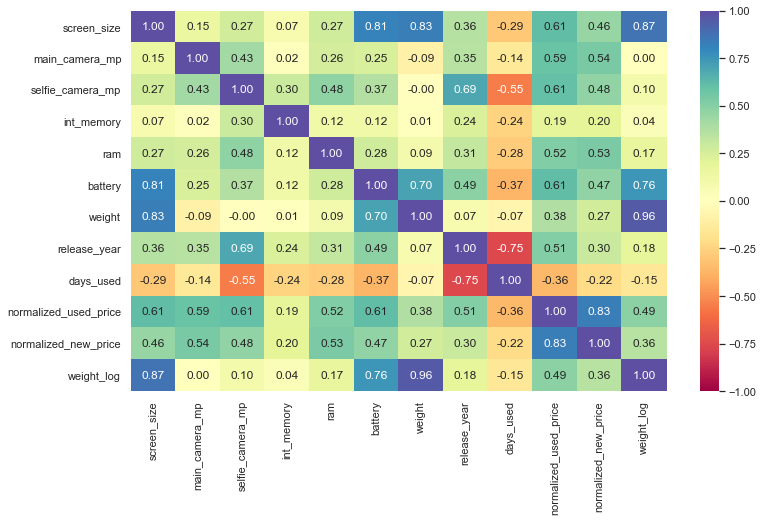

In [ ]:
# heatmap showing corrolations between attributes
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The `normalized_used_price` shows strong correlation against `normalized_new_price`
* `days_used` has a negative correlation with `normalized_used_price` but not significantly

## Data Preprocessing

#### Missing value treatment

In [ ]:
# checking for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

Smart phones get updated every year. So, we can categorize the devices into each given year and brand and then find the most common entry for each feature above to fill their missing values. 

In [ ]:
df1 = df.copy()

df1[["main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight"]] = df1.groupby(["release_year", "brand_name"])[
    ["main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight"]
].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

There are still missing values for some of the features. This means there were devices in a years and a brand category that non of them had entry for those features. This time, we will categorize our data into brand only and try finding most common entry for each feature in each brand category.

In [ ]:
df1[["main_camera_mp", "selfie_camera_mp", "battery", "weight"]] = df1.groupby(["brand_name"])[
    ["main_camera_mp", "selfie_camera_mp", "battery", "weight"]].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
weight_log                7
dtype: int64

There are still some missing values in the `main_camera_mp` column which indicates there is 1 or more brand that non of its records have entry for `main_camera_mp` feature. Let's find out which brand it is (or they are).

In [ ]:
df1[df1['main_camera_mp'].isnull()]['brand_name'].unique()[0]

'Infinix'

- *Infinix* is the only brand that non of the records for this brand has entry for `main_camera_mp` attribute.
- After reseaching on the web, I find out that majority of the *Infinix* smatrphones had a main camera of 13MP in 2019 and 2020. So, I will fill the remaining missing values in the `main_camera_mp` for this brand as 13MP.

In [ ]:
df1['main_camera_mp'].fillna(13, inplace = True)
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               7
dtype: int64

- We will re-apply the log-transform to the `weight` column.

In [ ]:
# applying log transform on the weight again to take care of missing values for weight_log column
df1["weight_log"] = np.log(df1["weight"])
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

* All missing values are filled

#### Feature engineering
We can transform the released year to number or years since release so it can be easier interpreted. If we assume the current date as the data collection date in 2021, the years since release year would be release year subtracted from 2021.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

#### Outlier detection and treatment

Looking back at the univariate analysis of the attributes, and a summay of boxplot distributions of them below, even though many of them shows sign of outliers but I beleive not all of them should be considered as outlier. I only considered `main_camera_mp`, `selfie_camera_mp`, and `int_memory` for outlier treatment.

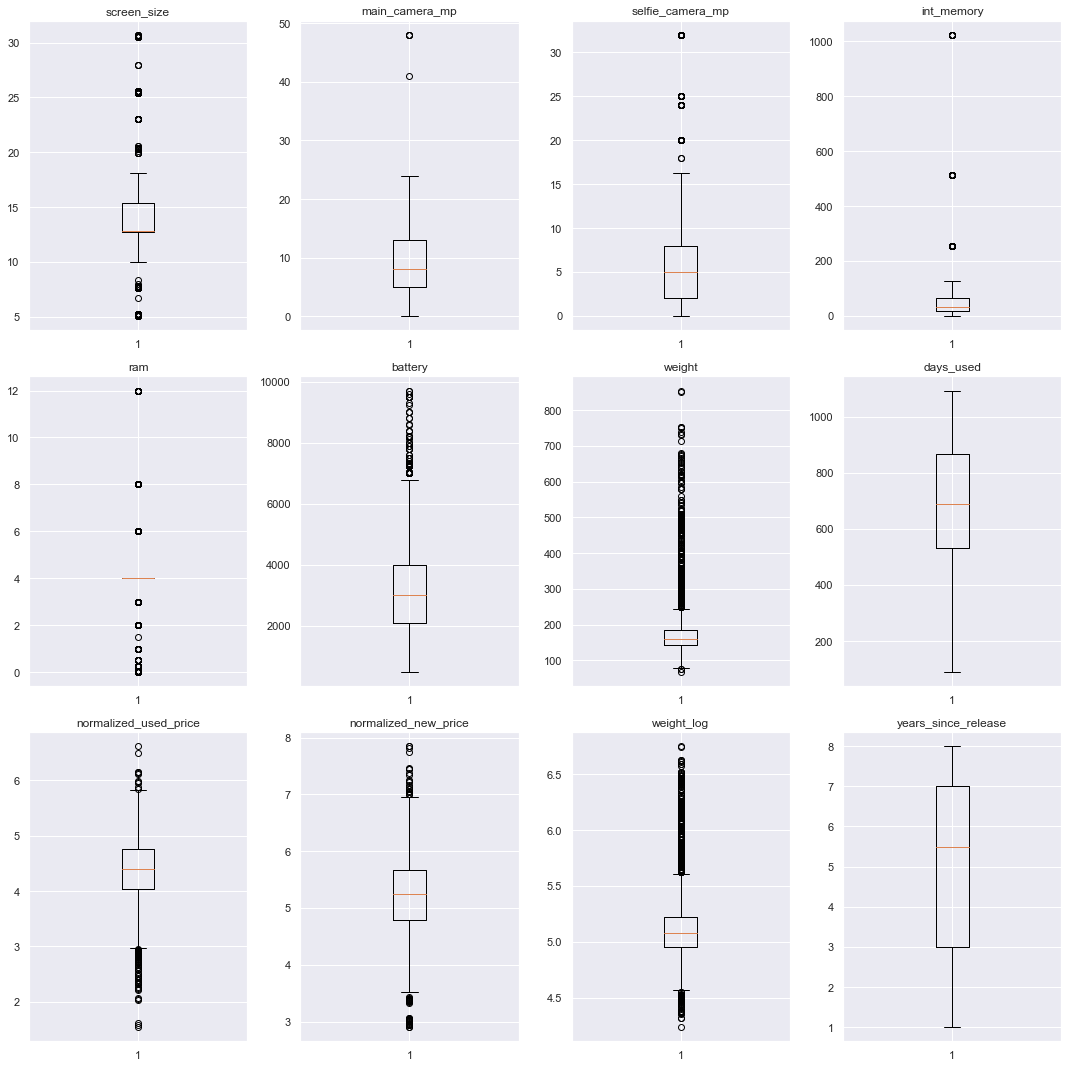

In [ ]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
## Complete the code to specify the columns for which outliers have to be treated
treat_out_cols = ['main_camera_mp', 'selfie_camera_mp', 'int_memory'] 

df2 = treat_outliers_all(df1, treat_out_cols)

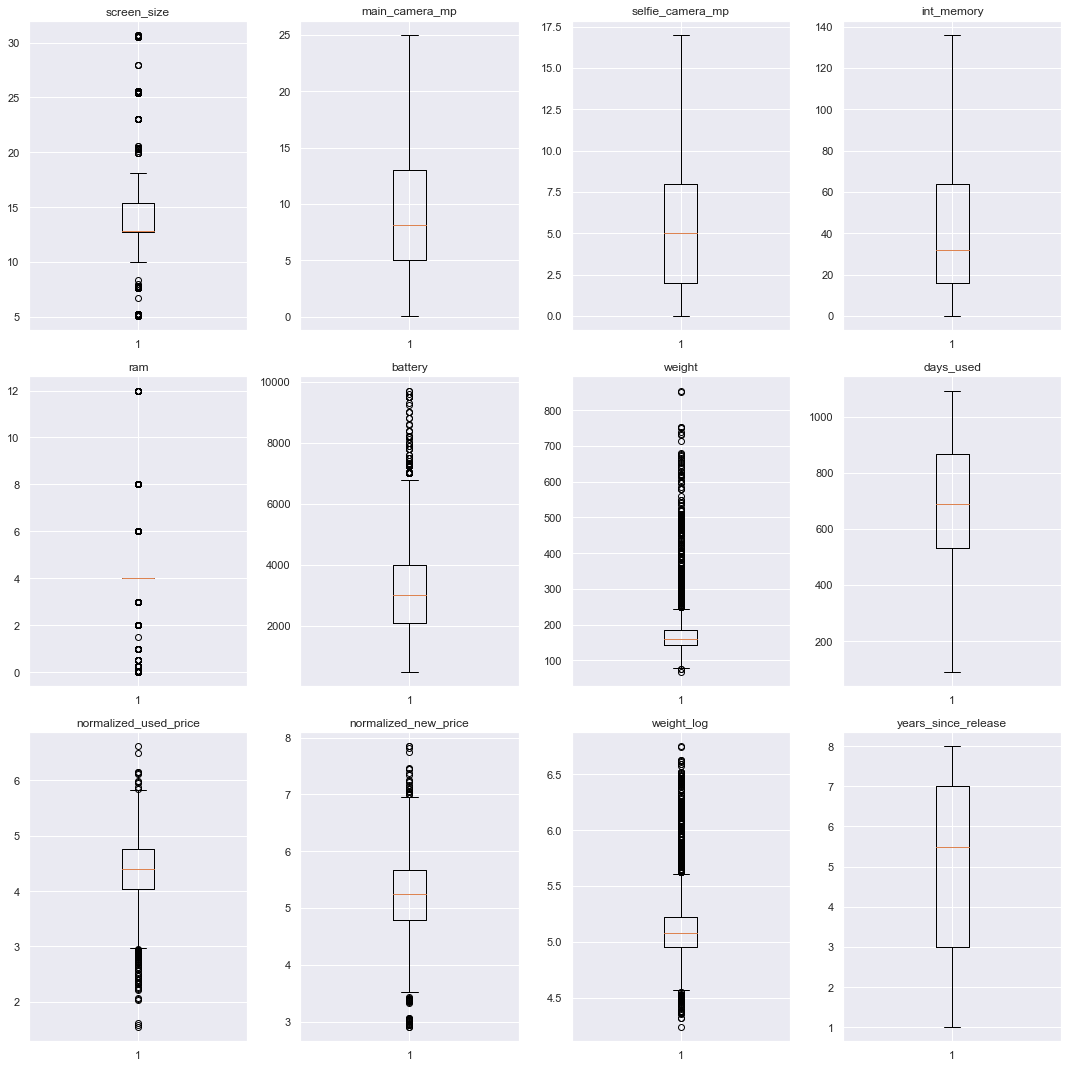

In [ ]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Preparing data for modeling

In [ ]:
# define dependent variable
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

In [ ]:
# to build linear regression_model
import statsmodels.api as sm

# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,weight_log,years_since_release,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,4.983607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,5.361292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,5.361292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,6.173786,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,5.220356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Building a Linear Regression model

In [ ]:
# fitting a linear model
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.848
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     270.5
Date:                   Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                           00:02:41   Log-Likelihood:                 152.09
No. Observations:                   2417   AIC:                            -204.2
Df Residuals:                       2367   BIC:                             85.34
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model performance evaluation

Check the performance of the model using different metrics like RMSE, MAE, and $R^2$

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227214,0.177866,0.848468,0.845266,4.266114


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237527,0.184233,0.843575,0.835643,4.476429


**Observations**

- The train and test $R^2$ are very close to 0.84, indicating that the model explains 84% of the total variation in the train and test sets respectively.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used-price within a mean error of 0.18 on the test set.

- MAPE of 4.47 on the test data means that we are able to predict within ~5% of the used-price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Test for Multicollinearity

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
pd.set_option("display.max_rows", 200)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                    3256.593228
screen_size                 7.798216
main_camera_mp              2.552121
selfie_camera_mp            3.954822
int_memory                  2.500234
ram                         2.227695
battery                     4.113927
weight                     20.511891
days_used                   2.668901
normalized_new_price        3.452983
weight_log                 19.574813
years_since_release         5.529883
brand_name_Alcatel          3.407144
brand_name_Apple           13.152999
brand_name_Asus             3.335050
brand_name_BlackBerry       1.638504
brand_name_Celkon           1.807866
brand_name_Coolpad          1.469348
brand_name_Gionee           1.951786
brand_name_Google           1.323061
brand_name_HTC              3.412458
brand_name_Honor            3.350350
brand_name_Huawei           5.987709
brand_name_Infinix          1.290592
brand_name_Karbonn          1.579399
brand_name_LG               4.854386
brand_name_Lava         

Assuming VIF of 10 as the threshold, `weight`, `weight_log`, `brand_name_Apple`, and `os_iOS` have VIF greater than 10 indicating they are corrolated with one or more independent features. This can be noticed specifically for Apple products since they are the only devices that have iOS as their operating system. That means they almost represent same information.

I will remove `weigth` as the first feature for multicollinearity check.

In [ ]:
X_train1 = X_train.drop(["weight"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:          ",
    np.round(olsres_1.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 4),
)

R-squared:           0.8485 
Adjusted R-squared: 0.8454


Dropping `weight` caused for $R^2$ and $Adjusted R^2$ to slightly increase, so I will be taking this featutre out of the model

In [ ]:
X_train = X_train.drop(["weight"], axis=1)

Let's check for multicollinearity again

In [ ]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1[vif_series1 > 5]))

VIF values: 

const                  951.271454
screen_size              7.096577
weight_log               6.151336
years_since_release      5.394407
brand_name_Apple        13.131185
brand_name_Huawei        5.987502
brand_name_Others        9.712706
brand_name_Samsung       7.542142
os_iOS                  11.830139
dtype: float64



Now lets see if droping the `brand_name_Apple` feature will change our model.

In [ ]:
X_train2 = X_train.drop(["brand_name_Apple"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 4),
)

R-squared: 0.8484 
Adjusted R-squared: 0.8454


$R^2$ and $Adjusted R^2$ did not change, so we can drop this column.

In [ ]:
X_train = X_train.drop(["brand_name_Apple"], axis=1)

Let's check for multicollinearity again

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2[vif_series2 > 5]))

VIF values: 

const                  946.357361
screen_size              7.040556
weight_log               6.134057
years_since_release      5.378374
brand_name_Huawei        5.589101
brand_name_Others        9.090422
brand_name_Samsung       6.988372
dtype: float64



I will continue dropping column with VIF greater than 5 to reduce dimentionality while making sure my $R^2$ is not changing drastically.

In [ ]:
X_train3 = X_train.drop(["brand_name_Others"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 4),
)

R-squared: 0.8484 
Adjusted R-squared: 0.8455


In [ ]:
X_train = X_train.drop(["brand_name_Others"], axis=1)

In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3[vif_series3 > 5]))

VIF values: 

const                  904.456630
screen_size              6.963454
weight_log               6.100379
years_since_release      5.378366
dtype: float64



In [ ]:
X_train4 = X_train.drop(["screen_size"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 4),
)

R-squared: 0.8453 
Adjusted R-squared: 0.8424


In [ ]:
X_train = X_train.drop(["screen_size"], axis=1)

In [ ]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4[vif_series4 > 5]))

VIF values: 

const                  587.651716
years_since_release      5.279305
dtype: float64



In [ ]:
X_train5 = X_train.drop(["years_since_release"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 4),
)

R-squared: 0.8444 
Adjusted R-squared: 0.8415


In [ ]:
X_train = X_train.drop(["years_since_release"], axis=1)

In [ ]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5[vif_series5 > 5] ))

VIF values: 

const    585.961641
dtype: float64



Now all the features have VIF greater than 5 as our threshold. We can continue with checking p-value of our variables and drop non-significant ones ($p-value > 0.05$)

In [ ]:
# loop through the model to find the max p-value and drop the corresponding variable until all the p-values are > 0.05

# initial list of columns
cols = X_train.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'brand_name_Alcatel', 'brand_name_Honor', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
### FINAL MODEL ###
### FINAL MODEL ###
### FINAL MODEL ###
### FINAL MODEL ###

olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     858.1
Date:                   Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                           00:02:44   Log-Likelihood:                 107.59
No. Observations:                   2417   AIC:                            -183.2
Df Residuals:                       2401   BIC:                            -90.54
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Checking the model performance again

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231436,0.18099,0.842785,0.841737,4.35412


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243087,0.188689,0.836167,0.833597,4.60404


All metrics for train and test data sets remain close to each other and close to the model's metric before removing multicollinearity

### Test for Linearity and Independence

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.797701,0.289787
1525,4.448399,4.694972,-0.246573
1128,4.315353,4.366415,-0.051063
3003,4.282068,4.141345,0.140723
2907,4.456438,4.553208,-0.096770


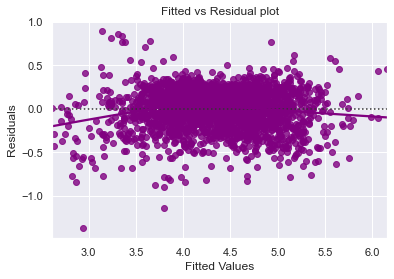

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* There is no pattern in the residual plot and data looks scattered. This implies the linearity and independence of the error terms.

### Test for Normality

Histogram of the error terms is a way to visually see if the the error terms follow a normal distribution:

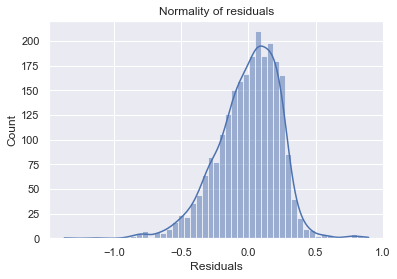

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape.
* Let's check the Q-Q plot.

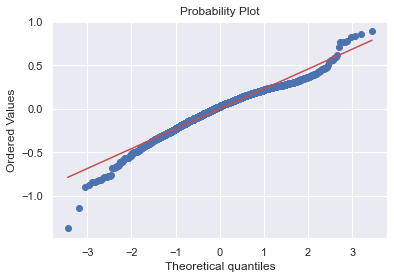

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line.
* Let's check the results of the Shapiro-Wilk test.

In [ ]:
# Shapiro test to check normality of the error terms
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9716361165046692, pvalue=1.7773504210027245e-21)

* p-value is less than 0.05 therefore, the residuals are not normal as per the Shapiro-Wilk test.
* We can apply transformations like log or exponential to our data in order to improve the normality assumption of our linear model however, as an approximation, we can accept this distribution as close to being normal. 

### Test for Homoscedasticity

Looking back at the residual vs fitted values, we can see that the residuals are forming a symmetrical shape. To confirm the homoscedastisity of the residuals, the goldfeldquandt test is used as follows:

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.0603175098856865), ('p-value', 0.15601124897705926)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model Summary

We can use the final model to predict the target variable and compare it against actual values in the test dataset:

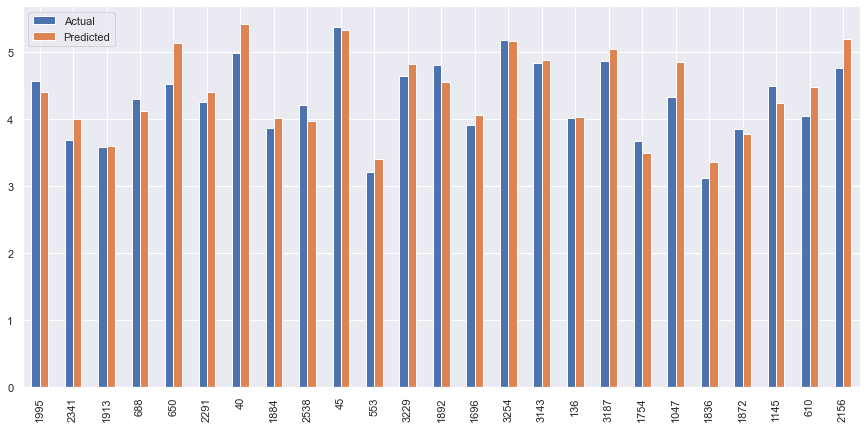

In [ ]:
# predictions on the test set
pred = olsmodel.predict(X_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})

df_temp = df_pred_test.sample(25, random_state=1)
df_temp.plot(kind="bar", figsize=(15, 7))
plt.show()

As we can see, our model does pretty good job in predicting the target variable. 

## Actionable Insights and Recommendations

In [ ]:
#  Review model for insights
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     858.1
Date:                   Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                           00:02:47   Log-Likelihood:                 107.59
No. Observations:                   2417   AIC:                            -183.2
Df Residuals:                       2401   BIC:                            -90.54
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

* The only brands that have a positive effect on the used priced are:
    * Alcatel
    * Honor
    * Karbonn
    * Lenovo
    * Nokia
    * Xiaomi
* Every additional GB ram shows increase of 0.0218 in normalized used price.
* Higher new price will result in higher used price
* Main and selfie camera have almost same influence on the used price.

#### Recommendation
* Model can be checked for improvement by removing outliers from more of the variables.
* The normality of the residuals could be enhanced by applying some transformation into the data